# n_ai problem eda

### Ideas:

1. Scale data
2. Try nonlinear features
3. Try to use clusterization
4. Try t 

### Journal

10.06.2016
Пробовал сделать кластеризацию с помощью K-means. На Кроссвалидаации показатели немного улучшились (на десятитысячные), на numerai - ухудшились.

14.06.2016
Первый значимый результат, использование совместно двух датасетов (с прошлого и текущего этапов) дало прирост на реальных данных. Нужно попробовать обучить модели специально для совмещенных датасетов.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
%matplotlib inline
plt.style.use('ggplot')

In [2]:
random_state = 42
data = pd.read_csv('./../data/nai_train_2.csv')
data.head(2)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,0.943745,0.40144,0.052459,0.251756,0.599198,0.433079,0.154292,0.921624,0.089638,0.117733,...,0.823646,0.196164,0.712755,0.86763,0.409075,0.307076,0.949682,0.607616,0.417547,1
1,0.929175,0.86327,0.905306,0.698717,0.416503,0.770084,0.626188,0.738225,0.568635,0.675989,...,0.810103,0.784314,0.614979,0.59866,0.314625,0.977315,0.711697,0.304693,0.768250,0


In [3]:
test_data = pd.read_csv('./../data/nai_test_2.csv')
test_data.head(2)

,t_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21
0,19778,0.607656,0.307651,0.058045,0.234352,0.890180,0.517335,0.542164,0.284514,0.264094,...,0.569874,0.596151,0.413212,0.455846,0.415088,0.709330,0.246704,0.191077,0.671681,0.414686
1,21465,0.019469,0.862912,0.711874,0.310788,0.785673,0.314365,0.946540,0.025331,0.874238,...,0.993083,0.959947,0.262189,0.989967,0.973802,0.794051,0.704770,0.083737,0.916388,0.035524


In [27]:
# Fot using both datasets

data_current = pd.read_csv('./../data/nai_train_2.csv')
data_old = pd.read_csv('./../data/nai_train.csv')
data = pd.concat([data_current, data_old])

X = all_data.drop(['target'], axis=1)
y = all_data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state)

In [26]:
X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state)

In [5]:
from sklearn.grid_search import GridSearchCV

def grid_search_clf(clf_to_train, param_grid, X_train, y_train):
    clf = GridSearchCV(estimator=clf_to_train, param_grid=param_grid,
                   n_jobs=-1, scoring='log_loss', verbose=True)
    clf.fit(X_train, y_train)
    print('best score: {0}'.format(clf.best_score_))
    print('best estimator:')
    print(clf.best_estimator_)
    return clf

def clf_score(clf, X_test, y_test):
    clf_probs = clf.predict_proba(X_test)
    return log_loss(y_test, clf_probs)

In [6]:
def get_ans(clf, X, y, test_data, transform=False):
    X_real_test = test_data.drop(['t_id'], axis=1)
    if transform:
        X_real_test = transform_data(X_real_test)
    clf.fit(X, y)
    real_pred = clf.predict_proba(X_real_test)
    pred = [it[1] for it in real_pred]
    ans = pd.DataFrame(test_data['t_id'])
    ans['probability'] = pred
    return ans

## Plotting

feature1


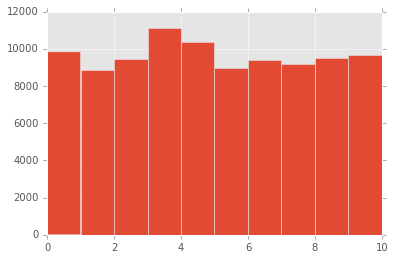

feature2


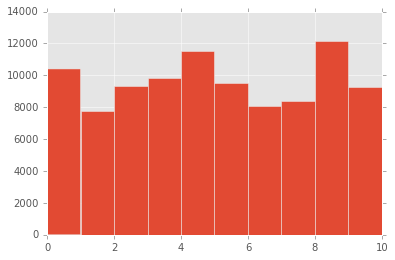

feature3


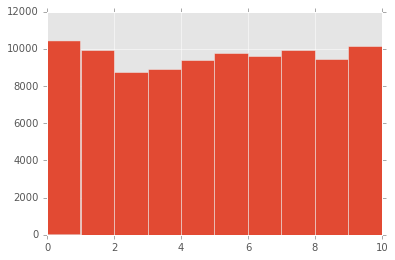

feature4


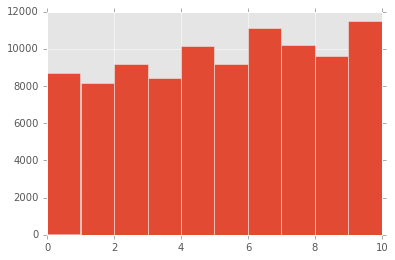

feature5


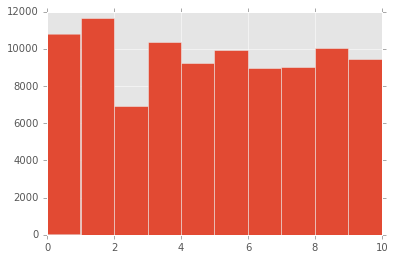

feature6


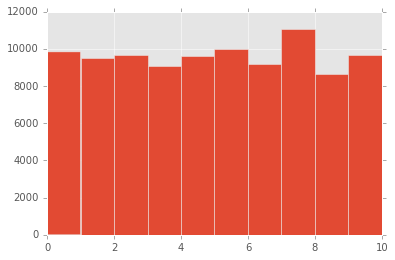

feature7


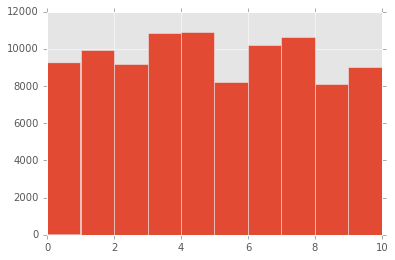

feature8


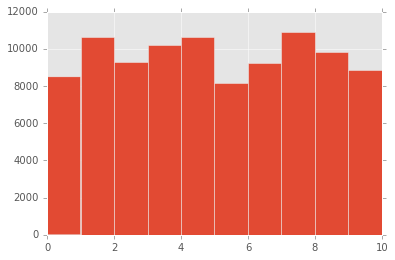

feature9


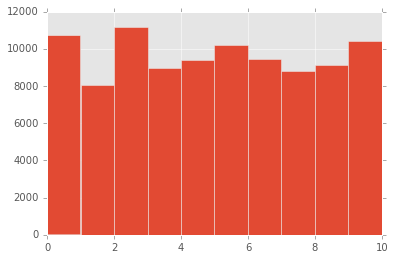

feature10


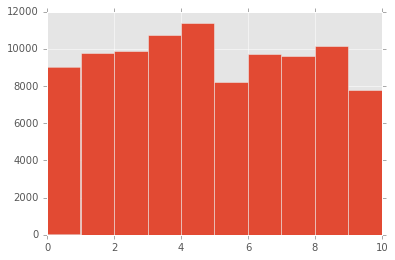

feature11


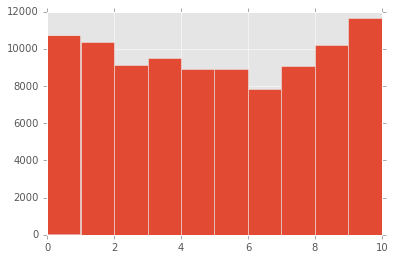

feature12


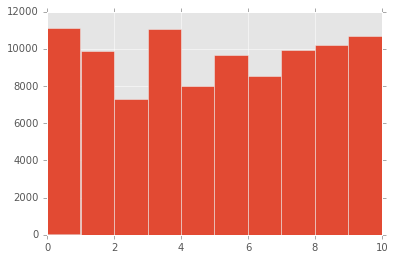

feature13


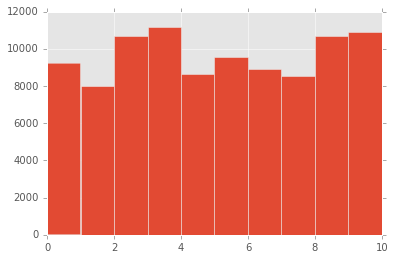

feature14


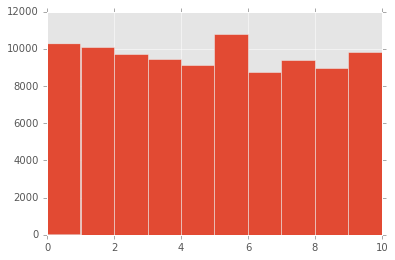

feature15


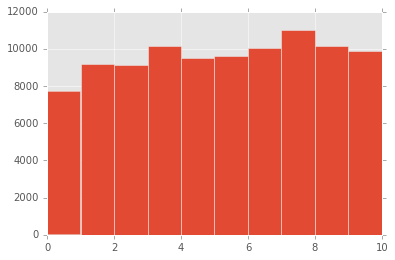

feature16


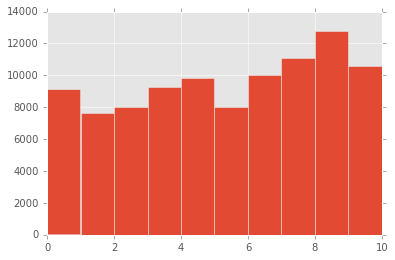

feature17


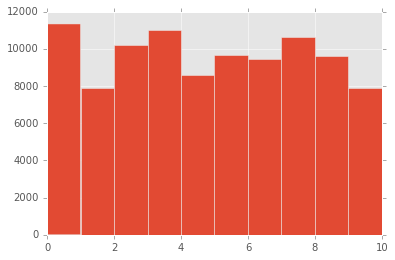

feature18


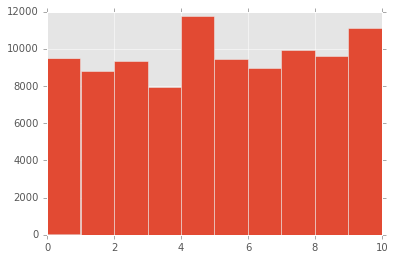

feature19


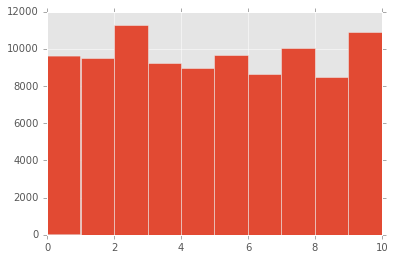

feature20


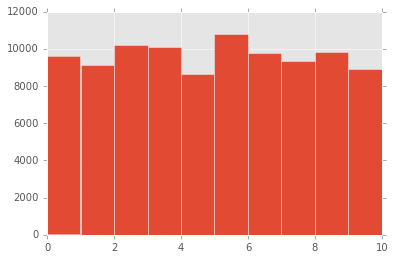

feature21


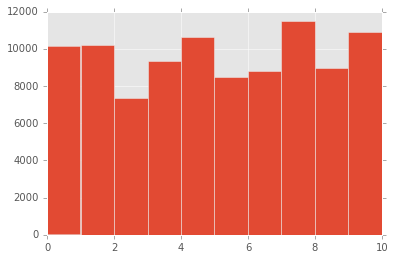

target


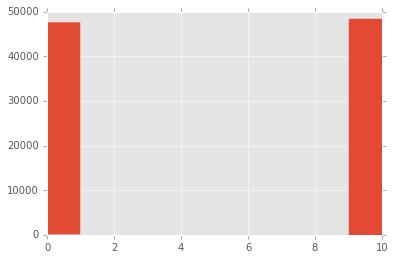

In [29]:
def prepare_hist(feature):
    bins = ((feature * 100 / 10)).astype(int)
    bins.hist()
    plt.show()
#     print bins
    
for feature in data.columns:
    print(feature)
    prepare_hist(data[feature])

feature1


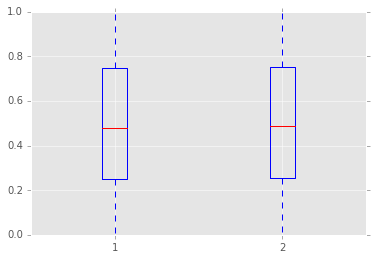

feature2


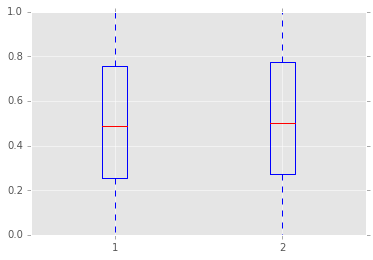

feature3


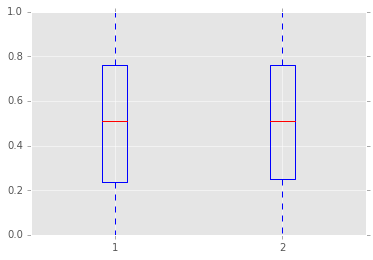

feature4


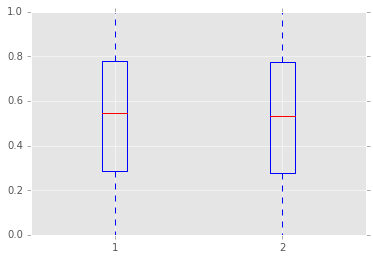

feature5


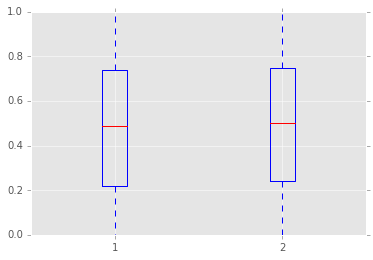

feature6


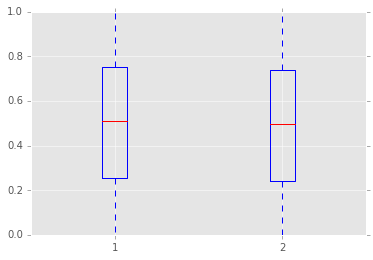

feature7


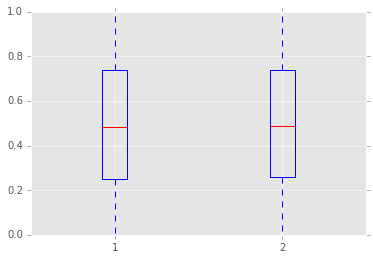

feature8


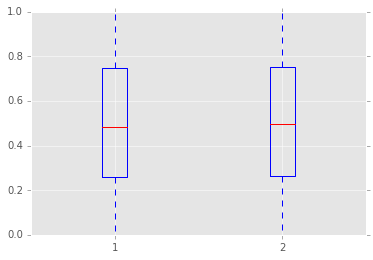

feature9


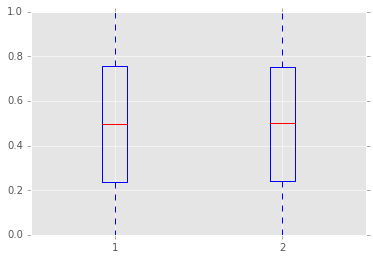

feature10


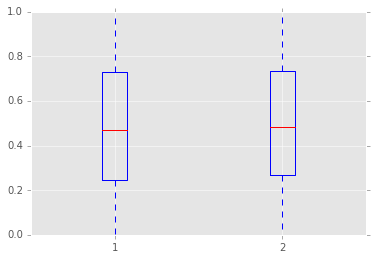

feature11


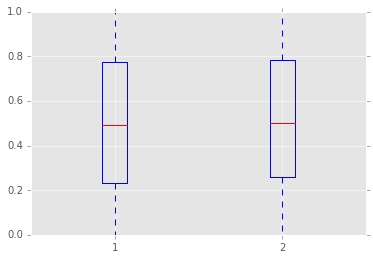

feature12


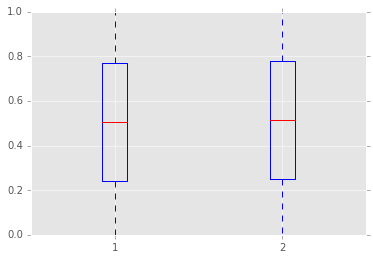

feature13


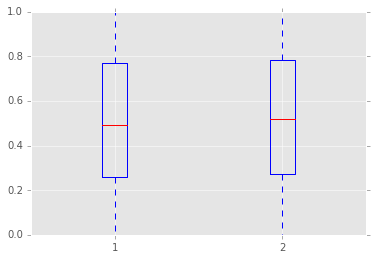

feature14


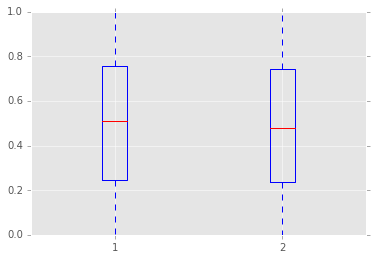

feature15


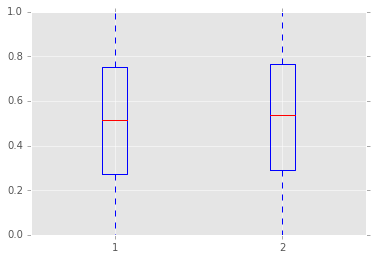

feature16


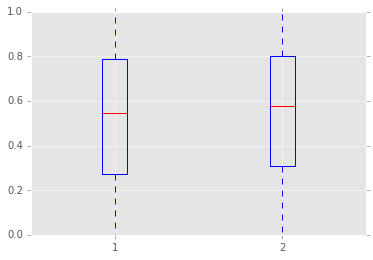

feature17


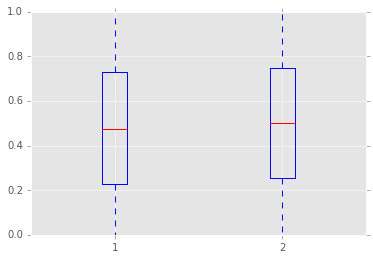

feature18


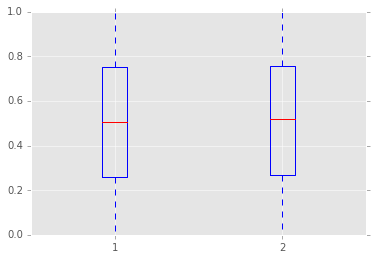

feature19


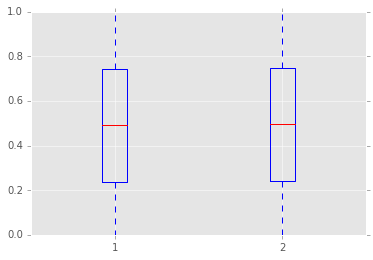

feature20


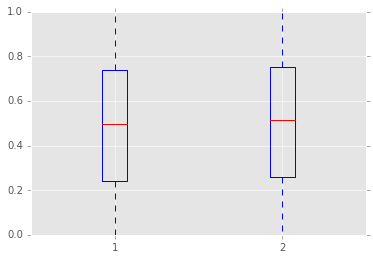

feature21


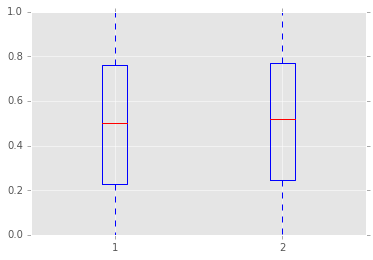

(-0.01848987936977098, 'feature15')
(-0.01758547476158001, 'feature16')
(-0.01681327071361438, 'feature17')
(-0.01394298137955785, 'feature13')
(-0.013804658825818994, 'feature20')
(-0.012726298224279453, 'feature11')
(-0.012631013543102587, 'feature5')
(-0.012264002305601873, 'feature2')
(-0.011625465340650343, 'feature21')
(-0.0105518385439613, 'feature10')
(-0.007414822275531918, 'feature18')
(-0.00737177560109159, 'feature12')
(-0.005292298445007615, 'feature8')
(-0.004067018673320544, 'feature3')
(-0.0035831971090640735, 'feature1')
(-0.0027252150525598484, 'feature7')
(-0.001690159266203639, 'feature19')
(-0.001057353084949808, 'feature9')
(0.008122562799113664, 'feature6')
(0.009364393105576796, 'feature4')
(0.014688679587229192, 'feature14')


In [42]:
def prepare_plot(x):
    plt.boxplot(x)# plot(target, feature)
    plt.show()

data_neg = data[data['target']==0]
data_pos = data[data['target']==1]
means_diff = []
for feature in data.columns:
    if feature == 'target':
        continue
    print(feature)
    means_diff.append((data_neg[feature].mean() - data_pos[feature].mean(), feature))
    prepare_plot([data_neg[feature], data_pos[feature]])
    
for mean in sorted(means_diff):
    print mean

In [50]:
corr_matrix = data.drop('target', axis=1).corr().replace(1.0, 0)
corr_matrix.abs().max()

# There are very correlated features
# TODO: Try to use regression with l1 to remove some features.

feature1     0.793415
feature2     0.753525
feature3     0.849208
feature4     0.857202
feature5     0.815433
feature6     0.778462
feature7     0.806859
feature8     0.793415
feature9     0.806859
feature10    0.789887
feature11    0.806889
feature12    0.772281
feature13    0.810960
feature14    0.857202
feature15    0.843541
feature16    0.843541
feature17    0.855935
feature18    0.849208
feature19    0.697613
feature20    0.855935
feature21    0.806889
dtype: float64

In [72]:
data.drop('target', axis=1).corrwith(data['target']).abs()

feature1     0.006226
feature2     0.021135
feature3     0.006928
feature4     0.016158
feature5     0.021573
feature6     0.014142
feature7     0.004797
feature8     0.009250
feature9     0.001805
feature10    0.018754
feature11    0.021169
feature12    0.012331
feature13    0.023864
feature14    0.025301
feature15    0.032704
feature16    0.030057
feature17    0.029178
feature18    0.012800
feature19    0.002888
feature20    0.024090
feature21    0.019812
dtype: float64

## Nonlinear data

In [100]:
def transform_data(X):
    nonlin_X = X.copy()
    for col in nonlin_X.columns:
        nonlin_X[col + '_sq'] = nonlin_X[col] ** 2
        nonlin_X[col + '_cube'] = nonlin_X[col] ** 3
#         nonlin_X[col + '_log'] = np.log(nonlin_X[col + '_sq'])
#     nonlin_X = normalize(X)
    return nonlin_X

In [60]:
nonlin_X = transform_data(X)

X_train, X_test, y_train, y_test = train_test_split(
    nonlin_X, y, test_size=0.33, random_state=random_state)

NameError: name 'transform_data' is not defined

### Adding cluster feature

In [19]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

def add_clust_feature(clst, data):
    if 't_id' in data.columns:
        clust_cols = pd.get_dummies(clst.predict(data.drop('t_id', axis=1)))
    else:
        clust_cols = pd.get_dummies(clst.predict(data))
    clust_cols.index = data.index
    res_data = pd.concat([data, clust_cols], axis=1)
    return res_data

In [21]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

n_clusters = 8

X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state)

clst = KMeans(n_clusters=n_clusters)
clst.fit(X_train);

X_train = add_clust_feature(clst, X_train)
X_test = add_clust_feature(clst, X_test)

In [130]:
# log_regression with k-means:
# 8 clusters: 0.691434677453
# 3 clusters: 0.691446751304

# 2 clusters: 0.691472370854
# 5 clusters: 0.691487633242
# 4 clusters: 0.691593318766
# 5 clusters: 0.691520027025

# Random forest

In [ ]:
clf_rf = RandomForestClassifier(random_state=random_state)

param_grid = {
    'n_estimators': [10, 30, 50, 100, 150, 200],
#     'criterion': ['gini', 'entropy'],
#     'max_features': ['sqrt', 'log2']
#     'max_depth': [i for i in range(2, 16)]#,
    'min_samples_split': [1, 3, 6],
    'min_samples_leaf': [1, 3, 6]
    
}

clf = grid_search_clf(clf_rf, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

In [40]:
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_samples_leaf=6, min_samples_split=1,
#             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
#             oob_score=False, random_state=42, verbose=0, warm_start=False)
# log_loss: 0.694575344696

In [16]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=6, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=181, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

ans = get_ans(clf, X, y, test_data)
ans.to_csv('test_ans.csv', index=False)

# Log regression

In [29]:
clf_log_reg = LogisticRegression(random_state=random_state)

param_grid = {
    'penalty' : ['l1'], # 'l1'
    'C': np.linspace(0.0001, 1.0, 30),
#     'solver': ['newton-cg', 'lbfgs', 'sag'] 
}

clf = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.9min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits
best score: -0.691527804433
best estimator:
LogisticRegression(C=0.17249655172413794, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
log_loss: 0.691526043542


In [ ]:
#  0.69091 on real data
# (only current data)
# Fitting 3 folds for each of 90 candidates, totalling 270 fits
# best score: -0.691881892887
# best estimator:
# LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l2', random_state=42, solver='sag', tol=0.0001,
#           verbose=0, warm_start=False)
# log_loss: 0.691494844159

In [ ]:
# WITH 8 Clusters using k-means 0.69109 on real data
# (only current data)
# Fitting 3 folds for each of 90 candidates, totalling 270 fits
# best score: -0.691983447855
# best estimator:
# LogisticRegression(C=0.034579310344827592, class_weight=None, dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
#           solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
# log_loss: 0.691421420986


In [14]:
clf = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
    intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
    penalty='l2', random_state=42, solver='sag', tol=0.0001,
    verbose=0, warm_start=False)

ans = get_ans(clf, X, y, test_data)
ans.to_csv('test_ans.csv', index=False)

In [22]:
# 0.69109 on real data
clst = KMeans(n_clusters=n_clusters)
clst.fit(X);

X_clust = add_clust_feature(clst, X)
test_data_clust = add_clust_feature(clst, test_data)

clf = LogisticRegression(C=0.034579310344827592, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

ans = get_ans(clf, X_clust, y, test_data_clust)
ans.to_csv('test_ans3.csv', index=False)

In [ ]:
#
# Fitting 3 folds for each of 90 candidates, totalling 270 fits
# best score: -0.691929279678
# best estimator:
# LogisticRegression(C=0.034579310344827592, class_weight=None, dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
#           solver='sag', tol=0.0001, verbose=0, warm_start=False)
# log_loss: 0.69146868926

In [20]:
# TOP RESULT: 0.69065 on real data

# Test using two datasets.
clf = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
    intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
    penalty='l2', random_state=42, solver='sag', tol=0.0001,
    verbose=0, warm_start=False)

data = pd.read_csv('./../data/nai_train_2.csv')
additional_data = pd.read_csv('./../data/nai_train.csv')
all_data = pd.concat([data, additional_data])

X = all_data.drop(['target'], axis=1)
y = all_data['target']

ans = get_ans(clf, X, y, test_data)
ans.to_csv('test_ans6.csv', index=False)

In [ ]:
LogisticRegression(C=0.17249655172413794, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

ans = get_ans(clf, X, y, test_data)
ans.to_csv('test_ans7.csv', index=False)

# Compositions

In [115]:
# This composition doesn't work
# LOGLOSS 0.69335
clf1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=6, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=181, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

clf2 = LogisticRegression(C=0.009, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

clf3 = LogisticRegression(C=0.004, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

clf4 = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

# What if try differen algorithms with different waights ?
ans1 = get_ans(clf1, X, y, test_data)
ans2 = get_ans(clf2, X, y, test_data)
ans3 = get_ans(clf2, X, y, test_data)
ans4 = get_ans(clf, transform_data(X), y, test_data, transform=True)

In [116]:
compos_ans = pd.DataFrame(test_data['t_id'])
compos_ans['probability'] = (ans1['probability'] + ans2['probability'] +
                            ans3['probability'] + ans4['probability']) / 4.

compos_ans.to_csv('test_ans.csv', index=False)

## Tests

In [62]:
X = data[['feature15', 'feature14']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state)

In [63]:
clf_rf = RandomForestClassifier(random_state=random_state)

param_grid = {
    'n_estimators': [10, 30, 50, 100, 150, 200],
    'min_samples_split': [1, 3, 6],
    'min_samples_leaf': [1, 3, 6]
    
}

clf = grid_search_clf(clf_rf, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  4.8min finished


Fitting 3 folds for each of 54 candidates, totalling 162 fits
best score: -0.716290002778
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=6, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
log_loss: 0.718744502298


In [88]:
# best: 'feature15', 'feature14' | 0.692590268446
# 0.691447198504
# 0.6914463265

# NOT: feature6 - from bottom 'feature12' - from top

X = data[['feature15', 'feature16',
          'feature10', 'feature21', 'feature2', 'feature18',
          'feature5', 'feature11', 'feature20', 'feature13', 'feature17',
          'feature14', 'feature4']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state)

clf_log_reg = LogisticRegression(random_state=random_state)

param_grid = {
    'penalty' : ['l2'], # 'l1'
    'C': np.linspace(0.00001, 0.1, 40),
    'solver': ['newton-cg', 'lbfgs', 'sag'] 
}

clf = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   37.3s finished


Fitting 3 folds for each of 120 candidates, totalling 360 fits
best score: -0.691955119629
best estimator:
LogisticRegression(C=0.010265384615384615, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)
log_loss: 0.6914463265


In [ ]:
# Fitting 3 folds for each of 120 candidates, totalling 360 fits
# best score: -0.691955119629
# best estimator:
# LogisticRegression(C=0.010265384615384615, class_weight=None, dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
#           solver='sag', tol=0.0001, verbose=0, warm_start=False)
# log_loss: 0.6914463265

In [99]:
test_data = pd.read_csv('./../data/nai_test_2.csv')

clf = LogisticRegression(C=0.010265384615384615, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)


features = ['feature15', 'feature16', 'feature10', 'feature21',
        'feature2', 'feature18', 'feature5', 'feature11', 'feature20',
        'feature13', 'feature17', 'feature14', 'feature4']

test_data[features]
test_data[features]

ans = get_ans(clf, data[features], y, test_data[features + ['t_id']])
ans.to_csv('test_ans2.csv', index=False)

## XGB

In [6]:
import xgboost as xgb


param_grid = {
     'max_depth' : [3, 5, 8],
    'n_estimators' : [25, 50, 100],
    'learning_rate': np.linspace(0.0001, 1, 5),
}

xclf = xgb.XGBClassifier()

clf = grid_search_clf(xclf, param_grid, X_train, y_train)

# xclf = xgb.XGBClassifier(max_depth=3, n_estimators=300,
#                   learning_rate=0.05).fit(X_train, y_train)

print clf

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.9min finished


Fitting 3 folds for each of 45 candidates, totalling 135 fits
best score: -0.692903105464
best estimator:
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.25007499999999999, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=25,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [25, 50, 100], 'learning_rate': array([  1.00000e-04,   2.50075e-01,   5.000

In [8]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

log_loss(y_test, pred)

16.394907546844362